# Análisis Exploratorio de Datos: Titanic


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)

### ¿Qué factores están relacionados con que los pasajeros tengan una mayor/menor probabilidad de sobrevivir?

## 1.- Cargandos los datos.

In [2]:
db=pd.read_csv("Titanic.csv")

Veamos la estructura general de los datos para saber con que estamos trabajando.

In [4]:
db.shape

(891, 12)

In [5]:
db.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Aqui vemos que hay algunas columnas con datos datos nulos, en la fase de preprocesamiento nos encargaremos de eso.

In [7]:
db.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 2.- Pre-procesamiento de los Datos.

Despues de ver los rasgos generales del DataSet, pasamos a un pre-procesado del mismo para poder trabajar mas comodamente. 

Comenzaremos por fijar el indice usando la columna de PassengerId.

In [3]:
db.set_index("PassengerId", inplace=True)

In [9]:
db.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Ahora vamos a quitar las columnas que no nos aportan ninguna informacion relevante, como pueden ser Name y Ticket.

In [4]:
db.drop(labels=['Name', 'Ticket'], axis = 1, inplace = True)
db.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,NaN,S
2,1,1,female,38.0,1,0,71.2833,C85,C
3,1,3,female,26.0,0,0,7.9250,NaN,S
4,1,1,female,35.0,1,0,53.1000,C123,S
5,0,3,male,35.0,0,0,8.0500,NaN,S


Vamos a contar la cantidad de datos nulos por columna por si aun hubiera mas columnas que no nos sirven, o por si tuvieramos que modificarlas.

In [13]:
db.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Vemos que en Age hay una cantidad decente de valores nulos (casi el 20%) por lo que no podemos quitarlos y ya, pero no es lo suficientemente grande como para despreciar la columna entera ya que es bastante relevante. Asi pues vamos a rellenar los datos vacios con la edad media.

In [5]:
mean_age = db.Age.mean()
db.Age.fillna(mean_age, inplace = True)
db.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

La siguiente columna con datos nulos es Cabin, el numero de cabina. El ~77% de los datos es nulo, por lo que ignoraremos la columna entera ya que no hay informacion suficiente y no se puede rellenar con ningun estadistico relevante. Ademas, no parece ser un dato relevante para nuestro estudio.

In [6]:
db.drop(labels='Cabin', axis = 1, inplace = True)
db.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


Por ultimo, Embark tiene 2 datos vacios, asi que lo rellenaremos con la moda.

In [7]:
embark_mode = db.Embarked.mode()[0]
db.Embarked.fillna(embark_mode, inplace = True)
db.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Ya para acabar, vamos a transformar la columna de genero en un valor numerico, asignando 0 a los hombres y 1 a las mujeres. El objetivo de esto es que se incluya esta columna en futuros mapas de calor.

In [8]:
db['Sex']= db["Sex"].apply(lambda x: 0 if x=="male" else 1)
db.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,S
2,1,1,1,38.0,1,0,71.2833,C
3,1,3,1,26.0,0,0,7.9250,S
4,1,1,1,35.0,1,0,53.1000,S
5,0,3,0,35.0,0,0,8.0500,S


Ahora si, ya estamos listos para empezar el analisis.

## 3.- Descripcion Estadistica de los Datos y Visualizacion.

Una vez los datos han sido preparados es hora de ir analizando y representando algunas de las variables mas representativas para ver posibles pistas que nos ayuden en el analisis.

### Vamos a empezar por ver la distribucion por genero (recordemos que 0 = hombre y 1 = mujer).

In [18]:
db.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [19]:
db.Sex.value_counts(normalize=True)

0    0.647587
1    0.352413
Name: Sex, dtype: float64

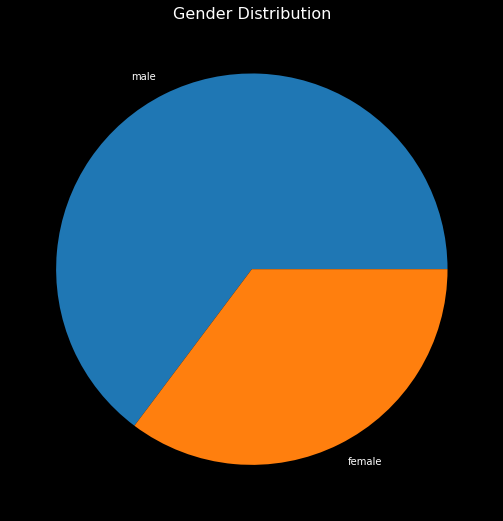

In [25]:
fig = plt.figure()
fig.patch.set_facecolor('black')

plt.rcParams['text.color'] = 'white'

fig = plt.pie(db.Sex.value_counts(), labels=["male", 'female'])

plt.title(label="Gender Distribution", fontdict={"fontsize":16})

plt.show()

Observamos que el numero de hombres es casi el doble que el de mujeres, teniendo en cuenta, ademas, la epoca en la que zarpo el titanic, prestaremos especial atencion a estos datos de cara a los analisis multivariables. 

### La distribucion por clases.

In [21]:
db.Pclass.value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [22]:
db.Pclass.value_counts(normalize=True).sort_index()

1    0.242424
2    0.206510
3    0.551066
Name: Pclass, dtype: float64

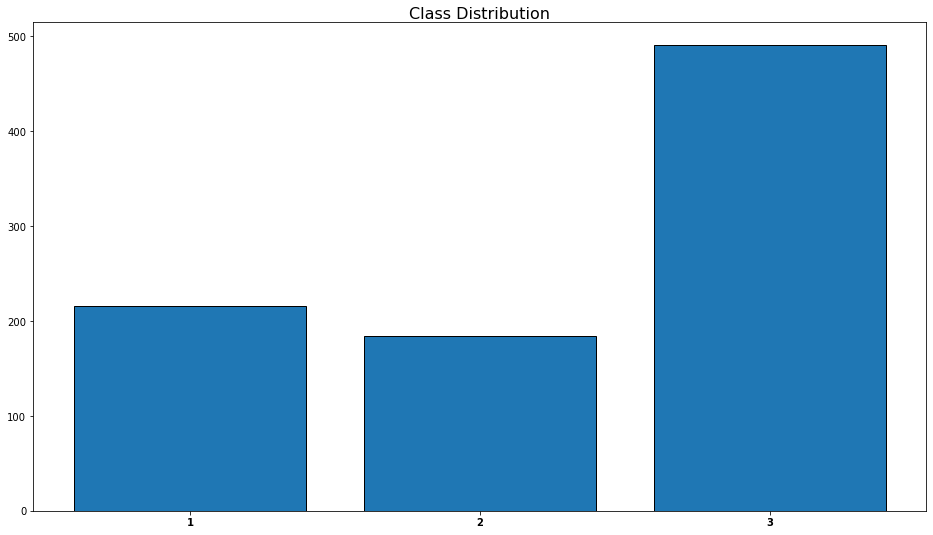

In [44]:
fig = plt.bar(x=sorted(db.Pclass.unique()), height=db.Pclass.value_counts().sort_index(), tick_label=['1','2','3'], edgecolor='black')

plt.rcParams['text.color'] = 'black'
plt.title(label="Class Distribution", fontdict={"fontsize":16}, loc='center', pad=1)

plt.xticks(rotation='horizontal', fontweight='bold')
plt.show()

La mayoria de pasajeros viajaban en tercera clase, como es de esperar. Prestaremos atencion tambien a este hecho de cara al indice de supervivencia.

### Una vez vistas las variables categoricas, pasamos a las numericas, empezando por la edad.

In [24]:
db.Age.describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

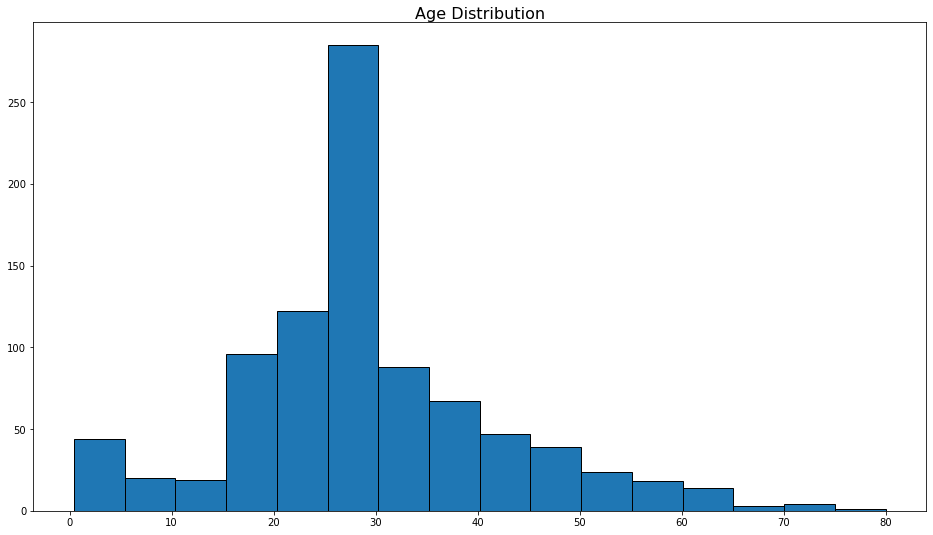

In [46]:
fig = plt.hist(db['Age'], edgecolor='black', bins=16)

plt.rcParams['text.color'] = 'black'
plt.title(label="Age Distribution", fontdict={"fontsize":16}, loc='center', pad=1)

plt.show()

Se observa un gran registro de pasajeros de 25-30 años y, sorprendente repunte de niños con edades entre 0 y 5. Pese a la presencia de outliners de hasta 80 años, no podemos despreciarlos pues es una variable muy influyente en el indice de supervivencia de una persona.

### Y la tarifa que pago cada pasajero.

In [26]:
db.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

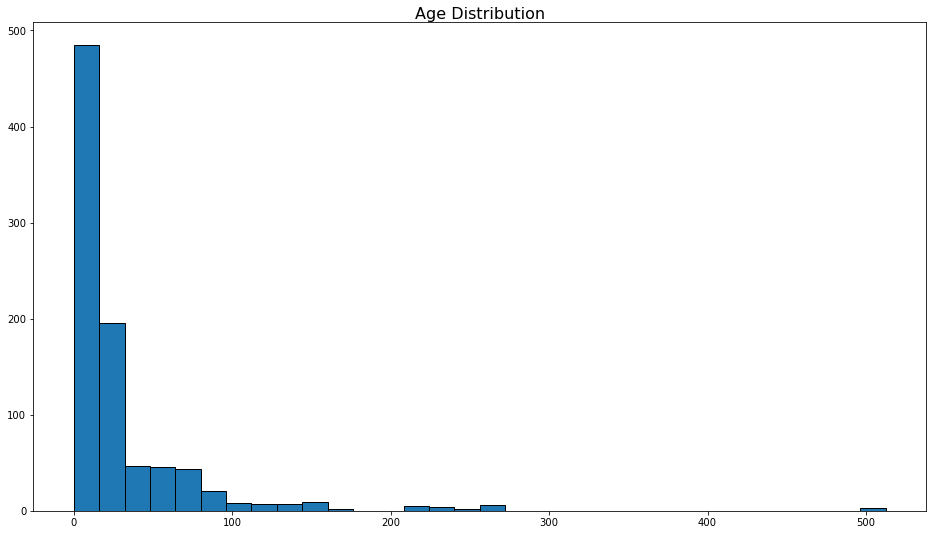

In [48]:
fig = plt.hist(db['Fare'], edgecolor='black', bins=32)

plt.rcParams['text.color'] = 'black'
plt.title(label="Age Distribution", fontdict={"fontsize":16}, loc='center', pad=1)

plt.show()

Aunque a priori no deberia influir mucho, puede ser interesante (de cara a publicitar viajes) demostrar que una tarifa mas alta pueda aumentar las posibilidades de sobrevivir a una catastrofe.

## 4.- Interacciones entre Variables.

Comenzaremos por hacer una matriz de correalacion entre las variables para detectar posibles variables innecesarias o relevantes.

In [28]:
corr_matrix = db.corr()
corr_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000


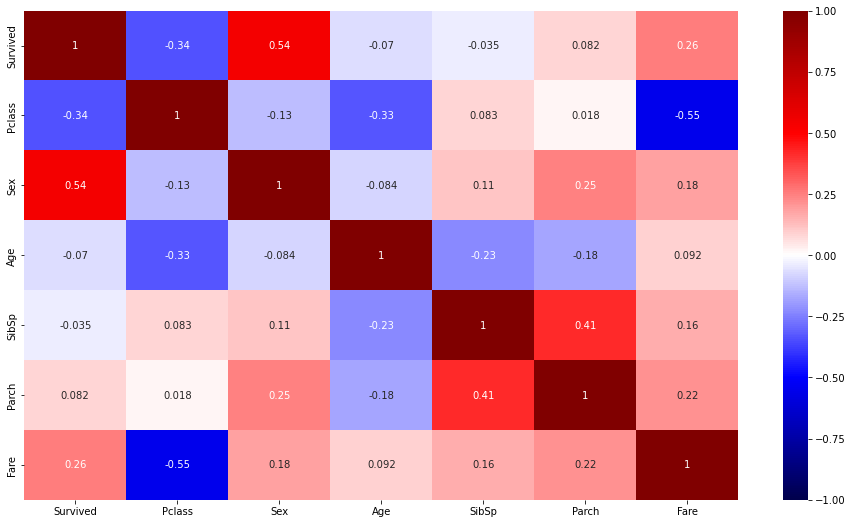

In [29]:
sns.heatmap(corr_matrix, vmin=-1.0, annot=True, cmap = "seismic")
plt.show()

En el mapa de calor podemos observar que las variables que mas afectan a si el pasajero sobrevivio o no son el genero, la tarifa y la clase, asi pues prestaremos especial atencion a esas tres en concreto. Otras variables que estan relacionadas son (clase y tarifa), (edad y clase), (genero y padres/hijos), (padres/hijos y hermanos/esposos) y (padres/hijos con tarifa), aunque todas estas son relaciones esperables por motivos evidentes. Cabe mencionar como dato curioso que la edad es la segunda variable que menos influye en el indice de supervivencia, cosa que a priori uno esperaria que fuera de los factores mas decisivos, por ello lo revisaremos tambien mas detenidamente.

### Antes de nada, miraremos si de verdad la variable edad no es relevante.

In [50]:
db.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,30.415100,12.457370,1.00,23.0,29.699118,35.0,74.0
1,342.0,28.549778,13.772498,0.42,21.0,29.699118,35.0,80.0


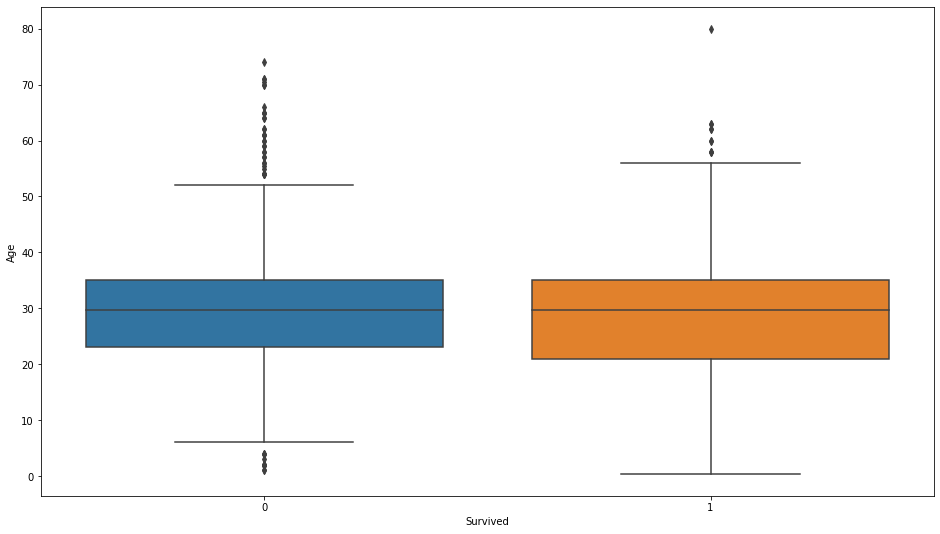

In [51]:
sns.boxplot(x=db.Survived, y=db.Age)
plt.show()

En vista del grafico obtenido vemos que, efectivamente, el perfil de edad de los supervivientes y de los no supervivientes es practicamente identico. Pese a que la intuicion nos llevaria a pensar que los mas jovenes sobrevivirian mas, aqui podemos observar que es indiferente.

### A continuacion pasamos a la variable Fare.

In [32]:
db.groupby('Survived')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


Como era de esperar la tarifa media de los que sobrevivieron es mas alta, asi como la desviacion tipica y los diferentes cuartiles. Veamos ahora un grafico de violines que nos muestre mejor la distribucion:

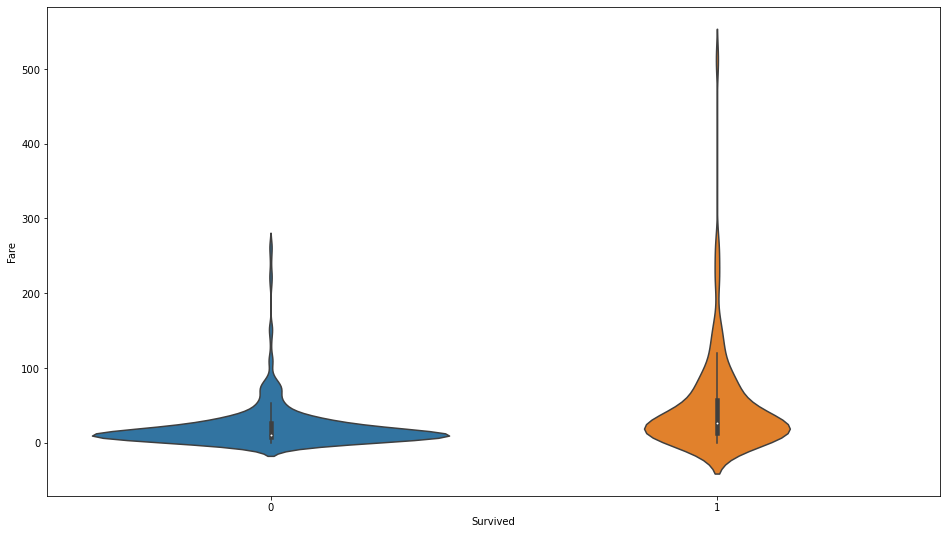

In [ ]:
sns.violinplot(x=db.Survived, y=db.Fare)
plt.show()

Efectivamente, las tarifas mas altas se situan en la casilla del 1 (si sobrevivio), mientras que las mas bajas estan en el 0 (no sobrevivio). Esto deja en evidencia que los tickets mas caros son los mas seguros.

### Veamos ahora la variable Pclass.

In [ ]:
db.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [ ]:
db.Pclass.value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

Para ver graficamente los datos vamos a hacer una grafica de barras donde se muestren tanto los pasajeros que sobrevivieron como los que no por cada clase.

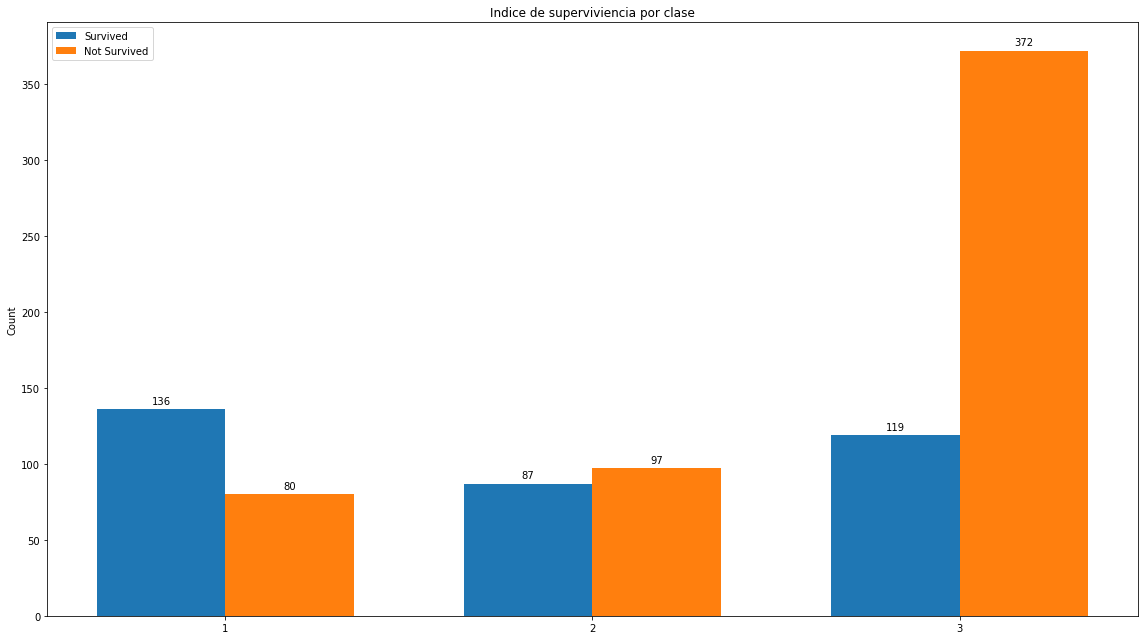

In [ ]:
# Fijamos los valores de cada conteo obtenidos en el groupby y value count.
survived = [136, 87, 119]
not_survived = [80, 97, 372] # Obtenidos restando.

# Fijamos las x del grafico para que sean el numero de la clase
x = np.arange(1,4) 
width = 0.35 #Ancho de las barras

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, survived, width, label='Survived')
rects2 = ax.bar(x + width/2, not_survived, width, label='Not Survived')

# Añadimos el titulo, nombre de los ejes, leyenda, etc
ax.set_ylabel('Count')
ax.set_title('Indice de superviviencia por clase')
ax.set_xticks(x)
ax.legend()

#Ponemos el valor de cada barra encima
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

En vista de los datos, podemos sacar una conclusion similar a lo que se vio tras analizar la tarifa, lo cual es logico. Esto es asi ya que, aunque el mumero de supervivientes es similar, en porcentaje la mortalidad de los pasajeros de tercera clase es mucho mayor, de ahi que el mapa de calor nos mostrara una relacion negativa.

### Por ultimo incluiremos en el analisis anterior el sexo de los pasajeros para ver cuanto influye (recordemos, 0 = hombre, 1 = mujer).

In [47]:
func = lambda x: 100*(x.sum()/db['Survived'].sum())
result = pd.pivot_table(data=db, index='Sex', columns='Pclass',values='Survived', aggfunc=func)
result

Pclass,1,2,3
Sex,,,
0,13.157895,4.970760,13.742690
1,26.608187,20.467836,21.052632


En esta tabla se muestra el porcentaje de los supervivientes en cada categoria. Veamoslo en un mapa de calor antes de sacar las conclusiones.

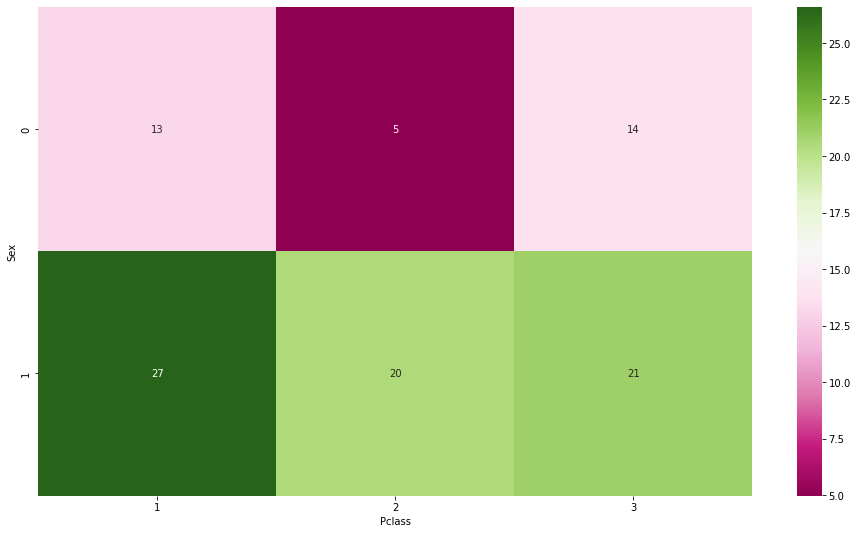

In [49]:
sns.heatmap(result, annot=True, cmap = 'PiYG')
plt.show()

Como era de esperar, en cualquier caso el indice de supervivencia de las mujeres es el doble, o mas, que el de los hombres (68% frente al 32%). Cosa que era totalmente predecible por circunstancias sociales de la epoca.

## 5.- Conclusion.

Tras el analisis de los datos podemos destacar dos factores fundamentales que han influido en la probabilidad de supervivencia de cada uno de los pasajeros: el genero y el poder adquisitivo. Resultando a favor de las mujeres y de los mas adinerados, respectivamente. Estos resultados son de lo mas esperable por motivos sociologicos y no generan ningun tipo de sorpresa. Quizas lo mas relevante haya sido descubrir que la edad no es un factor relevante en este caso en particular.

## 6.- Modelo de Prediccion.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### 6.1 -- Pre-pocesamiento de los datos.

In [54]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 94.9+ KB


Elegimos las variables input y la variable a predecir:

In [50]:
eje_x = db[["Age", "Pclass", "Sex", "SibSp", "Parch", "Fare", "Embarked"]].copy(deep=True)
eje_y = db[["Survived"]].copy(deep=True)

Ahora vamos a transformar las variables categoricas a numericas. Como ya habiamos transformado previamente Sex, solo nos queda Embarked.

In [51]:
le_dict = {}
Le = LabelEncoder()
eje_x["Embarked"] = Le.fit_transform(eje_x["Embarked"])
le_dict["Embarked"] = Le

In [52]:
eje_x

,Age,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,22.000000,3,0,1,0,7.2500,2
2,38.000000,1,1,1,0,71.2833,0
3,26.000000,3,1,0,0,7.9250,2
4,35.000000,1,1,1,0,53.1000,2
5,35.000000,3,0,0,0,8.0500,2
...,...,...,...,...,...,...,...
887,27.000000,2,0,0,0,13.0000,2
888,19.000000,1,1,0,0,30.0000,2
889,29.699118,3,1,1,2,23.4500,2


El siguiente paso va a ser estandarizar las variables numericas.

In [53]:
numeric_var_list = ["Age","SibSp","Parch","Fare"]

In [54]:
scaler_dict = {}
for num_var in numeric_var_list:
    se = StandardScaler()
    eje_x[num_var] = se.fit_transform(eje_x[num_var].to_numpy().reshape(-1,1))
    scaler_dict[num_var] = se

In [55]:
eje_x

,Age,Pclass,Sex,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,-0.592481,3,0,0.432793,-0.473674,-0.502445,2
2,0.638789,1,1,0.432793,-0.473674,0.786845,0
3,-0.284663,3,1,-0.474545,-0.473674,-0.488854,2
4,0.407926,1,1,0.432793,-0.473674,0.420730,2
5,0.407926,3,0,-0.474545,-0.473674,-0.486337,2
...,...,...,...,...,...,...,...
887,-0.207709,2,0,-0.474545,-0.473674,-0.386671,2
888,-0.823344,1,1,-0.474545,-0.473674,-0.044381,2
889,0.000000,3,1,0.432793,2.008933,-0.176263,2


### 6.2 -- Correlaciones entre Variables.

Veamos, una vez estandarizados todos los datos, si hay nuevas correlaciones que nos permitan eliminar columnas innnecesarias o no.

In [56]:
x_for_corr = eje_x.copy()
x_for_corr["Survived"] = eje_y

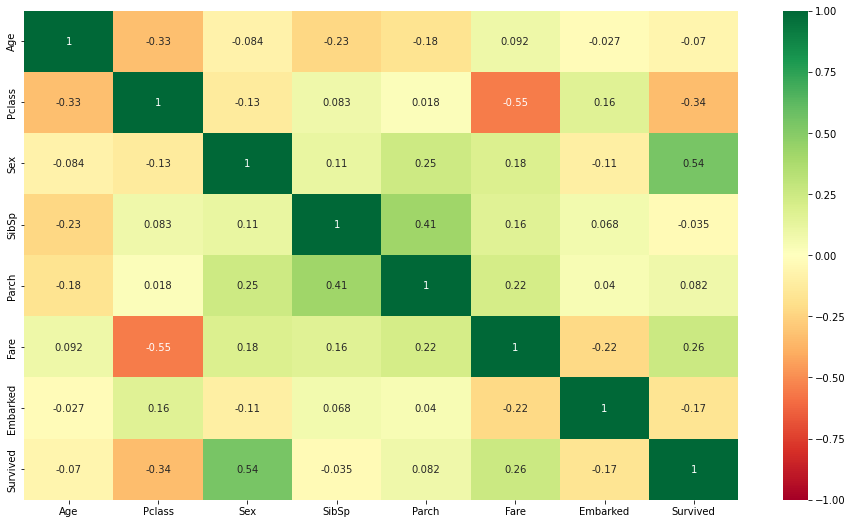

In [57]:
corr_matrix = x_for_corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap = 'RdYlGn', vmin=-1.0)
plt.show()

Como ya sabiamos, Fare y Pclass estan fuertemente relacionadas, pero no lo suficiente. Asi pues trabajaremos con los datos como estan.

### 6.3 -- Division de los Datos y Entrenamiento.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(eje_x, eje_y, test_size=0.2)

Usaremos el algoritmo de regresion logistica para este caso.

In [59]:
logisticRegr = LogisticRegression()

In [60]:
logisticRegr.fit(X_train, y_train)

c:\Users\Tony\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

Vamos a definir una funcion que nos indique el indice de acierto de nuestro modelo en tanto por 1.

In [61]:
def accuracy(ground_truth, predictions):
    comp = list(ground_truth == predictions)
    n_true = comp.count(True)
    n_false = comp.count(False)
    return n_true/(n_true + n_false)

Y ahora vamos a testear el algortimo.

In [62]:
predictions_train = logisticRegr.predict(X_train)
ground_truth_train = y_train.to_numpy().reshape(-1)

In [63]:
accuracy(ground_truth_train, predictions_train)

0.8286516853932584

En el set de entrenamiento nos ha dado un 82.86% de acierto. Veamos en el de testeo.

In [64]:
predictions_test = logisticRegr.predict(X_test)
ground_truth_test = y_test.to_numpy().reshape(-1)

In [65]:
accuracy(ground_truth_test, predictions_test)

0.7094972067039106

Obtenemos un 70.94% de aciertos con datos que son desconocidos para el modelo, es decir, es bastante bueno, aunque no es el mejor. Metodos mas avanzados son necesarios para verificar estos resultados.

### 6.4 -- Conclusiones.

Este modelo se presta a modelos de machine learning, aunque no es demasiado potente. Seguramente debido a la muestra tan pequeña de datos o de variables relevantes. Esto es algo que se apreciaba en los mapas de calor, puesto que pocas variables tenian una fuerte correlacion con la variable objetivo. Aun asi se puede decir que los resultados son positivos.